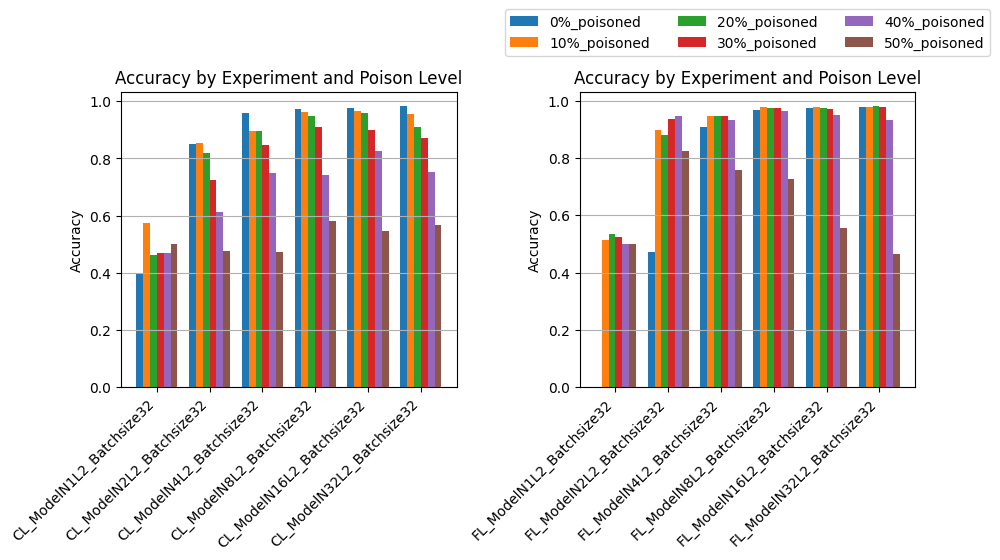

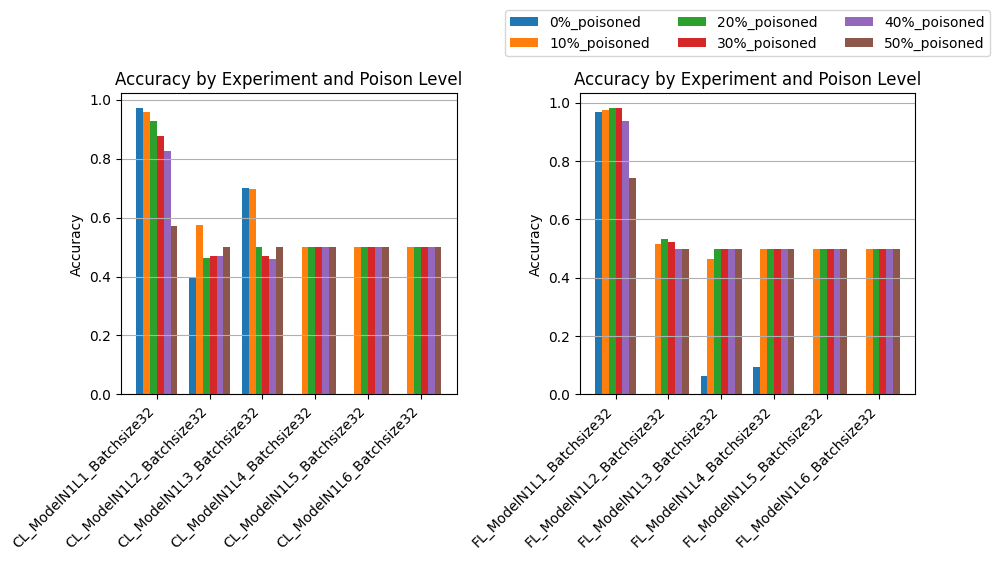

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_list = [
    r'results\summary_acc_test_000.csv',
    r'results\summary_acc_test_001.csv',
    r'results\summary_acc_test_002.csv',
]

df_all = pd.concat([pd.read_csv(f) for f in csv_list], ignore_index=True)
# print(df_all)
EXPERIMENTs = ['CL', 'FL']
nodes = [1, 2, 4, 8, 16, 32]
layers = [1, 2, 3, 4, 5, 6]

df_cl_list = []
df_fl_list = []
for experiment in EXPERIMENTs:
    for n in nodes:
        l = 2
        df_filter = df_all[(df_all['EXPERIMENT'].str.contains(experiment)) & (df_all['EXPERIMENT'].str.contains(f"N{n}L")) & (df_all['EXPERIMENT'].str.contains(f"L{l}"))]
        if experiment == 'CL':
            df_cl_list.append(df_filter)
        else:
            df_fl_list.append(df_filter)
df_cl_cat = pd.concat(df_cl_list, ignore_index=True)
df_fl_cat = pd.concat(df_fl_list, ignore_index=True)
df_cl_cat.drop_duplicates(inplace=True)
df_fl_cat.drop_duplicates(inplace=True)

# plot bar x-axis: experiment, y-axis: 0%_poisoned  10%_poisoned  20%_poisoned  30%_poisoned  40%_poisoned  50%_poisoned
width = 0.13  # width of each bar

fig, ax = plt.subplots(1,2, figsize=(10, 7))

labels = df_cl_cat['EXPERIMENT']
x = np.arange(len(labels))  # label locations
poison_levels = [col for col in df_cl_cat.columns if '_poisoned' in col]
for i, p in enumerate(poison_levels):
    ax[0].bar(x + i*width, df_cl_cat[p], width, label=p)
ax[0].set_xticks(x + width*len(poison_levels)/2 - width/2)
ax[0].set_xticklabels(labels, rotation=45, ha='right')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Experiment and Poison Level')
ax[0].grid(axis='y')
ax[0].yaxis.grid(which='minor', linestyle='--', alpha=0.7)
# ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=3)

labels = df_fl_cat['EXPERIMENT']
x = np.arange(len(labels))  # label locations
poison_levels = [col for col in df_fl_cat.columns if '_poisoned' in col]
for i, p in enumerate(poison_levels):
    ax[1].bar(x + i*width, df_fl_cat[p], width, label=p)
ax[1].set_xticks(x + width*len(poison_levels)/2 - width/2)
ax[1].set_xticklabels(labels, rotation=45, ha='right')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy by Experiment and Poison Level')
ax[1].grid(axis='y')
ax[1].yaxis.grid(which='minor', linestyle='--', alpha=0.7)
ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=3)


plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.show()

###################################################################
        
df_cl_list = []
df_fl_list = []
for experiment in EXPERIMENTs:
    for l in layers:
        n = 1
        # contains method
        df_filter = df_all[(df_all['EXPERIMENT'].str.contains(experiment)) & (df_all['EXPERIMENT'].str.contains(f"N{n}L")) & (df_all['EXPERIMENT'].str.contains(f"L{l}"))]
        if experiment == 'CL':
            df_cl_list.append(df_filter)
        else:
            df_fl_list.append(df_filter)
df_cl_cat = pd.concat(df_cl_list, ignore_index=True)
df_fl_cat = pd.concat(df_fl_list, ignore_index=True)
df_cl_cat.drop_duplicates(inplace=True)
df_fl_cat.drop_duplicates(inplace=True)

# plot bar x-axis: experiment, y-axis: 0%_poisoned  10%_poisoned  20%_poisoned  30%_poisoned  40%_poisoned  50%_poisoned
width = 0.13  # width of each bar

fig, ax = plt.subplots(1,2, figsize=(10, 7))

labels = df_cl_cat['EXPERIMENT']
x = np.arange(len(labels))  # label locations
poison_levels = [col for col in df_cl_cat.columns if '_poisoned' in col]
for i, p in enumerate(poison_levels):
    ax[0].bar(x + i*width, df_cl_cat[p], width, label=p)
ax[0].set_xticks(x + width*len(poison_levels)/2 - width/2)
ax[0].set_xticklabels(labels, rotation=45, ha='right')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Experiment and Poison Level')
ax[0].grid(axis='y')
ax[0].yaxis.grid(which='minor', linestyle='--', alpha=0.7)
# ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=3)

labels = df_fl_cat['EXPERIMENT']
x = np.arange(len(labels))  # label locations
poison_levels = [col for col in df_fl_cat.columns if '_poisoned' in col]
for i, p in enumerate(poison_levels):
    ax[1].bar(x + i*width, df_fl_cat[p], width, label=p)
ax[1].set_xticks(x + width*len(poison_levels)/2 - width/2)
ax[1].set_xticklabels(labels, rotation=45, ha='right')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy by Experiment and Poison Level')
ax[1].grid(axis='y')
ax[1].yaxis.grid(which='minor', linestyle='--', alpha=0.7)
ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=3)


plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.show()